In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [3]:
f1 = pd.read_csv('Fraud_check.csv')

In [4]:
f1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# EDA

In [6]:
f1[f1.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5523849030>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5523849570>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5523848d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5523849ab0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5523849d50>],
 'means': []}

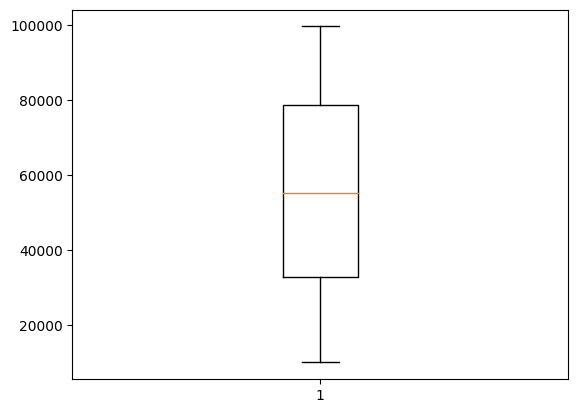

In [7]:
plt.boxplot(f1['Taxable.Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5521733ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5521768460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5521733c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55217689a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5521768c40>],
 'means': []}

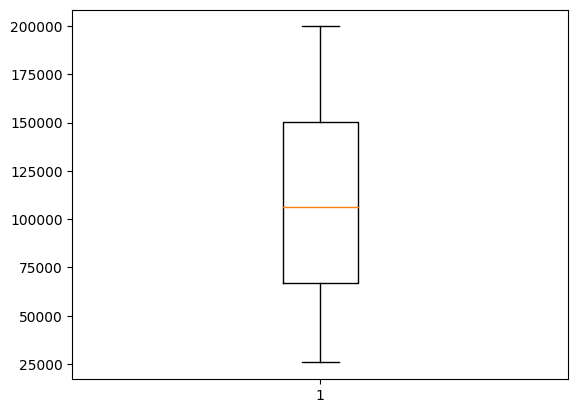

In [8]:
plt.boxplot(f1['City.Population'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55215e0340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55215e0760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55215e00a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55215e0ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55215e0f40>],
 'means': []}

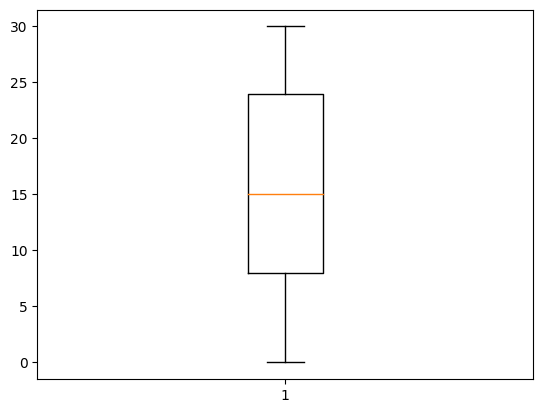

In [9]:
plt.boxplot(f1['Work.Experience'])

In [10]:
f1['Undergrad'] = f1['Undergrad'].astype('category')

In [11]:
f1['Marital.Status'] = f1['Marital.Status'].astype('category')

In [12]:
f1['Urban'] = f1['Urban'].astype('category')

In [13]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    category
 1   Marital.Status   600 non-null    category
 2   Taxable.Income   600 non-null    int64   
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    category
dtypes: category(3), int64(3)
memory usage: 16.3 KB


In [14]:
f1 = f1.join(pd.get_dummies(f1[['Undergrad', 'Marital.Status']]))
f1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,NO,Single,68833,50047,10,YES,1,0,0,0,1
1,YES,Divorced,33700,134075,18,YES,0,1,1,0,0
2,NO,Married,36925,160205,30,YES,1,0,0,1,0
3,YES,Single,50190,193264,15,YES,0,1,0,0,1
4,NO,Married,81002,27533,28,NO,1,0,0,1,0


In [15]:
f1 = f1.drop(['Undergrad', 'Marital.Status'], axis = 1)

In [16]:
f1.head()

,Taxable.Income,City.Population,Work.Experience,Urban,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,YES,1,0,0,0,1
1,33700,134075,18,YES,0,1,1,0,0
2,36925,160205,30,YES,1,0,0,1,0
3,50190,193264,15,YES,0,1,0,0,1
4,81002,27533,28,NO,1,0,0,1,0


In [17]:
Conditions=[(f1["Taxable.Income"]<=30000),(f1["Taxable.Income"]>30000)]
Categories=["Risky","Good"]

In [18]:
f1["Taxable.Income"]=np.select(Conditions,Categories)

In [19]:
f1["Taxable.Income"].head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Taxable.Income, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder()

In [22]:
f1['Urban'] = encoder.fit_transform(f1['Urban'])
f1['Urban']

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int64

In [23]:
f1['Taxable.Income'] = encoder.fit_transform(f1['Taxable.Income'])
f1['Taxable.Income']

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int64

# Test-Train Split

In [24]:
X = f1.iloc[:,1:]
X.head()

,City.Population,Work.Experience,Urban,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,50047,10,1,1,0,0,0,1
1,134075,18,1,0,1,1,0,0
2,160205,30,1,1,0,0,1,0
3,193264,15,1,0,1,0,0,1
4,27533,28,0,1,0,0,1,0


In [25]:
y= f1.iloc[:,0]

In [26]:
y.value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((420, 8), (180, 8), (420,), (180,))

# Resampling using SMOTE

In [31]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [32]:
SMOTE = SMOTETomek(random_state=42)
TM = TomekLinks()
X_train_res, y_train_res = TM.fit_resample(X_train,y_train)
X_train_res, y_train_res = SMOTE.fit_resample(X_train_res, y_train_res)

# Random Forest Classifier

In [324]:
RF_model = RandomForestClassifier(n_estimators = 100, max_depth = 13, max_features = 'sqrt', min_samples_split = 30, criterion = 'gini')

In [325]:
RF_model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=13, min_samples_split=30)

# Metrics

In [326]:
RF_pred_train = RF_model.predict(X_train_res)

In [327]:
confusion_matrix(y_train_res, RF_pred_train)

array([[203,  13],
       [ 62, 154]])

In [328]:
print(classification_report(y_train_res, RF_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       216
           1       0.92      0.71      0.80       216

    accuracy                           0.83       432
   macro avg       0.84      0.83      0.82       432
weighted avg       0.84      0.83      0.82       432



In [329]:
RF_pred_test = RF_model.predict(X_test)

In [330]:
confusion_matrix(y_test, RF_pred_test)

array([[125,  18],
       [ 35,   2]])

In [331]:
print(classification_report(y_test, RF_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       143
           1       0.10      0.05      0.07        37

    accuracy                           0.71       180
   macro avg       0.44      0.46      0.45       180
weighted avg       0.64      0.71      0.67       180



# AUC - ROC Curve

In [332]:
fpr, tpr, thres = roc_curve(y_test, RF_pred_test)

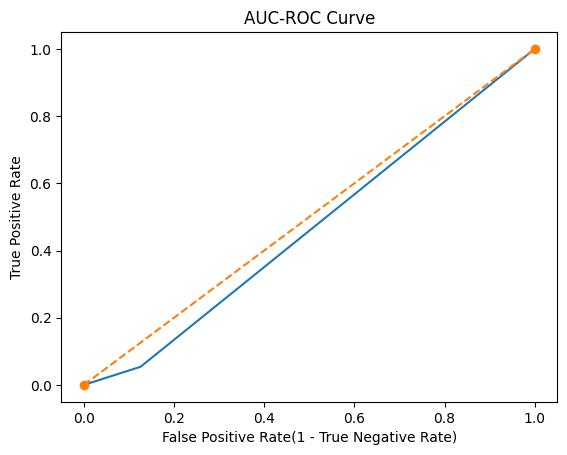

In [333]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], "o--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate(1 - True Negative Rate)")
plt.ylabel("True Positive Rate")
plt.show()